In [1]:
import xarray as xr

In [2]:
ds = xr.open_mfdataset('../data/final_sliced_1/*.nc')
analysed_sst = ds['analysed_sst']

In [3]:
analysed_sst

<xarray.DataArray 'analysed_sst' (time: 2803, lat: 173, lon: 185)>
dask.array<concatenate, shape=(2803, 173, 185), dtype=float32, chunksize=(1, 173, 185), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2007-04-30T12:00:00 ... 2014-12-31T12:00:00
  * lat      (lat) float32 -4.4 -4.2 -4.0 -3.8 -3.6 ... 29.2 29.4 29.6 29.8 30.0
  * lon      (lon) float32 59.2 59.4 59.6 59.8 60.0 ... 95.2 95.4 95.6 95.8 96.0
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    source:         EUR-L2P-ATS_NR_2P,REMSS_GRIDDED_25-AMSRE,NAVO-L2P-AVHRR17...
    comment:        SST defined at all grid points but no physical meaning is...

In [3]:
data = analysed_sst.compute()

In [17]:
data.shape[0]

2803

In [4]:
norm = (data - data.mean())/(data.max() - data.min())

In [5]:
norm_std = (data - data.mean())/(data.std())

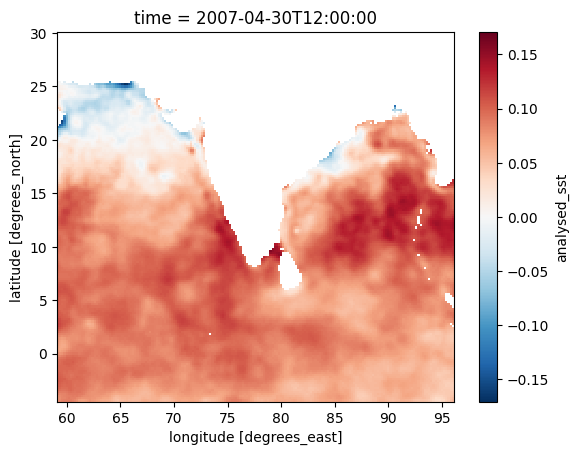

In [6]:
norm[0].plot()

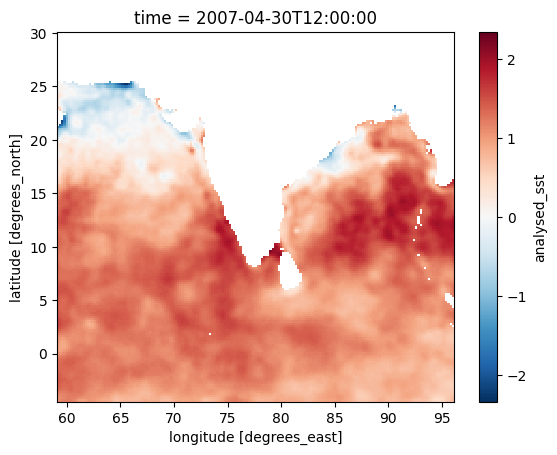

In [8]:
norm_std[0].plot()

In [9]:
norm_0 = (data[0] - data[0].mean())/(data[0].max() - data[0].min())
norm_std_0 = (data[0] - data[0].mean())/(data[0].std())

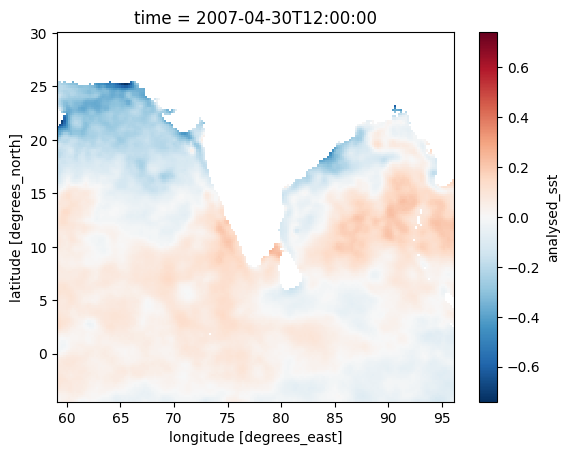

In [10]:
norm_0.plot()

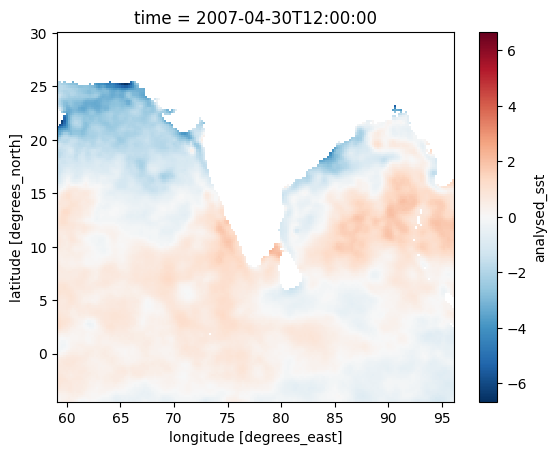

In [12]:
norm_std_0.plot()

### Testing reshaping

In [25]:
import numpy as np
bs = 32
time = data.shape[0]
np_data = data.to_numpy()

In [27]:
time_steps = time // bs
no_batches = time_steps * bs
no_batches

2784

In [29]:
trimmed = np_data[:2784]
trimmed.shape

(2784, 173, 185)

In [33]:
flattened = trimmed.flatten()
desired = (32, 87, 1, 173, 185)
reshaped = flattened.reshape(desired)

### Next try :(

In [4]:
data.shape

(2803, 173, 185)

In [6]:
data = data.to_numpy().reshape((1, 2803, 1, 173, 185))

In [7]:
data.shape

(1, 2803, 1, 173, 185)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.2, random_state=42)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.